In [1]:
import os
root = os.getcwd()
print(root)

/home/m2haque/private/project


In [2]:
from IPython import display
display.clear_output()
from ultralytics import YOLO
from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.9.5 torch-2.1.2+cu118 CUDA:0 (NVIDIA A30 MIG 2g.12gb, 12032MiB)
Setup complete ✅ (64 CPUs, 503.6 GB RAM, 532.1/1489.7 GB disk)


In [ ]:
# !pip install roboflow
# from roboflow import Roboflow
# rf = Roboflow(api_key="KpUJ4kedPjCqnDm8N2zh")
# project = rf.workspace("booleanlab").project("crypt_segmentation_2")
# version = project.version(1)
# dataset = version.download("yolov8")

In [1]:
# Train the model

# parameters
# model_path = 'yolov8m-seg.pt'
# data_path = f'{root}/datasets/crypt_segmentation_2-1/data.yaml'
# epochs = 200
# imgsz = 640
# batch = 16
# save_path = './datasets/project/spatial/result'


# model = YOLO(model_path)


# model.train(
#     data=data_path,
#     epochs=epochs,
#     imgsz=imgsz,
#     batch=batch,
#     save=True,
#     project=save_path,
# )


In [9]:
# Validate the model

# parameters
model_path = f'{root}/datasets/project/spatial/result/train4/weights/best.pt' # use the pre-trained model
data_path = f'{root}/datasets/crypt_segmentation_2-1/data.yaml'

# YOLO model
model = YOLO(model_path)

model.val(
    data=data_path
)


Ultralytics YOLOv8.0.28 🚀 Python-3.9.5 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /home/m2haque/private/project/datasets/crypt_segmentation_2-1/valid/labels.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.81s/it]
                   all         55        486      0.739       0.83      0.811      0.504      0.677      0.758      0.697      0.344
                 crypt         55        208      0.677      0.764      0.746      0.433       0.55       0.62      0.518      0.125
                 gland         55        278      0.802      0.896      0.877      0.574      0.805      0.896      0.877      0.564
Speed: 0.2ms pre-process, 18.1ms inference, 0.0ms loss,

In [109]:
# prediction

model_path = f'{root}/datasets/project/spatial/result/train4/weights/best.pt' # use the pre-trained model

conf_threshold = 0.5
# source_path = f'{root}/datasets/patches/output_patches_a' 
# save_path = f'{root}/datasets/prediction_a'
# source_path = f'{root}/datasets/patches/output_patches_c' 
# save_path = f'{root}/datasets/prediction_c'
# source_path = f'{root}/datasets/patches/output_patches_LI_A1' 
# save_path = f'{root}/datasets/prediction_LI_a1'
source_path = f'{root}/datasets/patches/output_patches_LI_A2' 
save_path = f'{root}/datasets/prediction_LI_a2'

# model
model = YOLO(model_path)

results = model.predict(
    source=source_path,
    conf=conf_threshold,
    project=save_path,
    save=True,
    hide_labels=False,
    hide_conf=False,
    save_txt=True
)


Ultralytics YOLOv8.0.28 🚀 Python-3.9.5 torch-2.1.2+cu118 CUDA:0 (NVIDIA GeForce RTX 2070, 7974MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs

image 1/16 /home/m2haque/private/project/datasets/patches/output_patches_LI_A2/patch_0.jpg: 640x640 22.2ms
image 2/16 /home/m2haque/private/project/datasets/patches/output_patches_LI_A2/patch_1.jpg: 640x640 22.3ms
image 3/16 /home/m2haque/private/project/datasets/patches/output_patches_LI_A2/patch_10.jpg: 640x640 22.2ms
image 4/16 /home/m2haque/private/project/datasets/patches/output_patches_LI_A2/patch_11.jpg: 640x640 22.3ms
image 5/16 /home/m2haque/private/project/datasets/patches/output_patches_LI_A2/patch_12.jpg: 640x640 22.2ms
image 6/16 /home/m2haque/private/project/datasets/patches/output_patches_LI_A2/patch_13.jpg: 640x640 17.6ms
image 7/16 /home/m2haque/private/project/datasets/patches/output_patches_LI_A2/patch_14.jpg: 640x640 17.6ms
image 8/16 /home/m2haque/private/project/datasets/patches/

In [3]:
save_path = f'{root}/datasets/prediction_a'

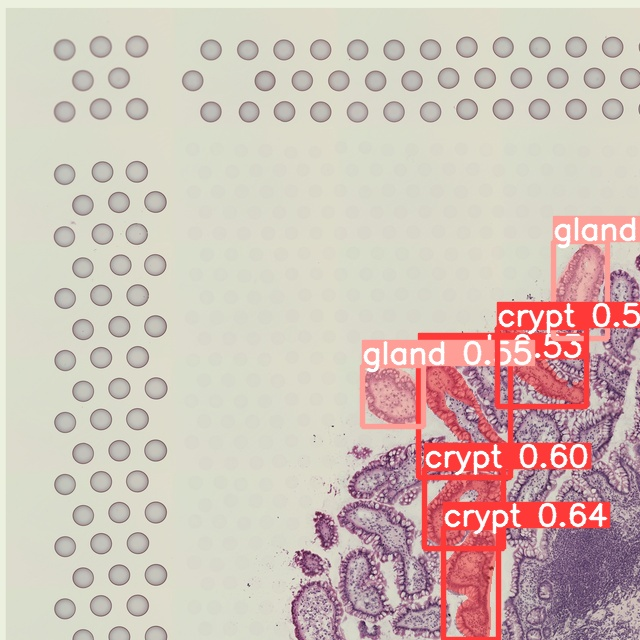

In [4]:
import glob
import matplotlib.pyplot as plt
from IPython.display import display, Image

# image_paths = glob.glob(f'{save_path}/predict/*.jpg')[:1]
image_paths = glob.glob(f'{save_path}/predict/patch_0.jpg')


for image_path in image_paths:
    display(Image(filename=image_path, height=600))


this code converts normalized coordinates to pixelated coordinates for boundary boxes. We used label folder patches.txt file

In [5]:
def convert_to_pixels(normalized_coords, image_width, image_height):

    pixel_coords = []
    for x_norm, y_norm in normalized_coords:
        x_pixel = int(float(x_norm) * image_width)
        y_pixel = int(float(y_norm) * image_height)
        pixel_coords.append((x_pixel, y_pixel))
    return pixel_coords

def process_file(file_path, image_width, image_height):
    bounding_boxes = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()[1:]  
            normalized_coords = [(parts[i], parts[i+1]) for i in range(0, len(parts), 2)]
            bounding_boxes.append(convert_to_pixels(normalized_coords, image_width, image_height))
    return bounding_boxes

# image dimensions
image_width = 640  # replace image's actual width
image_height = 640  # replace image's actual height


bounding_boxes = process_file(f'{root}/datasets/prediction_a/predict/labels/patch_0.txt', image_width, image_height)
# print(bounding_boxes)

In [75]:
# print(bounding_boxes)

this code just verify if the predicted images and labels are correctly forming the boundary boxes or not

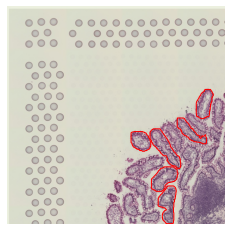

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

def plot_bounding_boxes(image_path, bounding_boxes):
    img = Image.open(image_path)
    fig, ax = plt.subplots()
    ax.imshow(img)

    for box in bounding_boxes:
        
        poly = np.array(box)
        poly = np.append(poly, [poly[0]], axis=0)  # close the polygon
        patch = patches.Polygon(poly, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(patch)

    plt.axis('off')
    plt.show()
    
image_path = f'{root}/datasets/patches/output_patches_a/patch_0.jpg' 
plot_bounding_boxes(image_path, bounding_boxes)

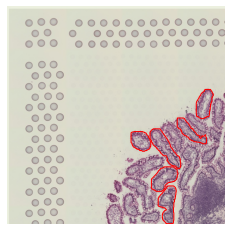

In [7]:
# just verifying if the pixelated coordinates are correct or not!!
def plot_bounding_boxes(image_path, bounding_boxes):
    img = Image.open(image_path)
    fig, ax = plt.subplots()
    ax.imshow(img)

    for box in bounding_boxes:
        
        poly = np.array(box)
        poly = poly.reshape((-1, 2))  
        poly = np.append(poly, [poly[0]], axis=0)  
        patch = patches.Polygon(poly, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(patch)

    plt.axis('off')
    plt.show()

plot_bounding_boxes(image_path, bounding_boxes)


get the square boxes

[(420, 360, 90, 117), (556, 244, 50, 86), (364, 368, 58, 58), (500, 328, 86, 76), (424, 472, 78, 72), (444, 528, 53, 111)]


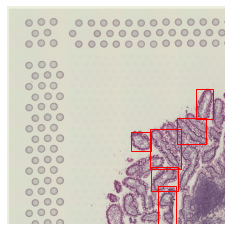

In [9]:
def convert_to_bounding_boxes(polygon_coords):
    bounding_boxes = []
    for polygon in polygon_coords:
    
        min_x = min_y = float('inf')
        max_x = max_y = float('-inf')

        for (x, y) in polygon:
            if x < min_x:
                min_x = x
            if x > max_x:
                max_x = x
            if y < min_y:
                min_y = y
            if y > max_y:
                max_y = y

        # calculate width and height
        width = max_x - min_x
        height = max_y - min_y

        # store bounding box
        bounding_boxes.append((min_x, min_y, width, height))

    return bounding_boxes

def plot_bounding_boxes(image_path, bounding_boxes):
    img = Image.open(image_path)
    fig, ax = plt.subplots()
    ax.imshow(img)

    for (x, y, width, height) in bounding_boxes:
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')
#     plt.savefig(output_path, bbox_inches='tight', pad_inches=0)  # Save the figure
    plt.show()  


polygon_coords = bounding_boxes 

# polygons to bounding boxes
bd_boxes = convert_to_bounding_boxes(polygon_coords)
print(bd_boxes)

# Specify the path to your image
# image_path = '/content/crypt_segmentation_2-1/test_new/patch_4.jpg'
# output_path = '/content/crypt_segmentation_2-1/test.jpg'

# Plotting the image with bounding boxes
plot_bounding_boxes(image_path, bd_boxes)

coordinates of the detected bounding boxes on crypts based on the resized image (2k*1979)

In [104]:
def translate_patch_coordinates_to_resized(detected_box, patch_box, resized_size, patch_size):
    px, py, pwidth, pheight = detected_box

    x1, y1, x2, y2 = patch_box

    # absolute position 
    resized_x = x1 + px
    resized_y = y1 + py
    resized_width = pwidth
    resized_height = pheight

    return (resized_x, resized_y, resized_width, resized_height)


detected_boxes =  bd_boxes 
# [
#     (432, 221, 57, 113),
#     (238, 218, 48, 66),
#     (336, 404, 78, 116),
#     (44, 268, 38, 116),
#     (84, 190, 94, 182),
#     (480, 272, 67, 128)
# ]  # List of detected boxes

patch_box = (1280, 640, 1920, 1280)  # coordinates of the patch on the resized image

resized_boxes = [translate_patch_coordinates_to_resized(box, patch_box, resized_size=(2000, 1979), patch_size=640) for box in detected_boxes]


for i, original_coordinates in enumerate(resized_boxes):
    print(f"Coordinates of detected object {i+1} on resized image:", original_coordinates)


Coordinates of detected object 1 on resized image: (1528, 1080, 101, 57)


In [98]:
resized_boxes

[(1008, 1304, 66, 60), (796, 1280, 78, 98), (952, 1408, 110, 106)]

In [ ]:
# A1 and A2 7042 x 6710

In [80]:
def translate_patch_coordinates_to_resized(detected_box, patch_box, resized_size, patch_size):
    px, py, pwidth, pheight = detected_box

    x1, y1, x2, y2 = patch_box

    resized_x = x1 + px
    resized_y = y1 + py
    resized_width = pwidth
    resized_height = pheight

    return (resized_x, resized_y, resized_width, resized_height)


detected_box = (44, 268, 38, 116)  # object detected at this position within the patch
patch_box = (640, 0, 1280, 640) # coordinates of the patch on the resized image [resized]

original_coordinates = translate_patch_coordinates_to_resized(detected_box, patch_box, resized_size=(2000, 1979), patch_size=640)
print("Coordinates of detected object on resized image:", original_coordinates)

Coordinates of detected object on resized image: (684, 268, 38, 116)


In [45]:
bd_boxes

[(432, 221, 57, 113),
 (238, 218, 48, 66),
 (336, 404, 78, 116),
 (44, 268, 38, 116),
 (84, 190, 94, 182),
 (480, 272, 67, 128)]

coordinates of the detected bounding boxes on crypts based on the original image (47k*48k)

In [38]:
def scale_patch_coordinates_to_original(detected_box, patch_box, scale_x, scale_y):
    px, py, pwidth, pheight = detected_box

    x1, y1, x2, y2 = patch_box

    orig_x = int(x1 + px * scale_x)
    orig_y = int(y1 + py * scale_y)
    orig_width = int(pwidth * scale_x)
    orig_height = int(pheight * scale_y)

    return (orig_x, orig_y, orig_width, orig_height)

detected_box = (84, 190, 94, 182)  # the patch [640x640]
patch_box = (15237, 0, 30474, 15564)  #original image [whole patch]
scale_x = 47000 / 2000  # Original width divided by resized width
scale_y = 48000 / 1979  # Original height divided by resized height

# scale the detected object coordinates to the original image dimensions
original_coordinates = scale_patch_coordinates_to_original(detected_box, patch_box, scale_x, scale_y)
print("Original coordinates of detected object:", original_coordinates)

Original coordinates of detected object: (17211, 4608, 2209, 4414)
